In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Question
* What is the average price of each distinct brand listed?
* Which kind of shoes have the widest distribution of prices?
* Is there a typical price distribution (e.g., normal) across brands or within specific brands?
* What the difference between sports shoes brands in colors?

In [33]:
df=pd.read_csv("Datafiniti_Womens_Shoes1.csv")
df.head()
df.columns

Index(['brand', 'name', 'prices.amountMax', 'prices.amountMin', 'prices.color',
       'prices.isSale', 'size', 'category', 'color'],
      dtype='object')

In [34]:
df['average']=round((df["prices.amountMax"]+df["prices.amountMin"])/2,2)
df['difference']=round((df["prices.amountMax"]-df["prices.amountMin"]),2)
pd.options.mode.chained_assignment = None  # default='warn'
df1=df[[ "brand", "prices.amountMax",
       "prices.amountMin","average","difference"]]

df1.head()

,brand,prices.amountMax,prices.amountMin,average,difference
0,2 lips too,64.95,39.99,52.47,24.96
1,2 lips too,64.95,49.99,57.47,14.96
2,2 lips too,64.95,49.99,57.47,14.96
3,2 lips too,64.95,39.99,52.47,24.96
4,2 lips too,64.95,42.49,53.72,22.46


# Question
* What is the average price of each distinct brand listed?
* Which kind of shoes have the widest distribution of prices?

Text(0.5, 1.0, 'Most expensive average price brand')

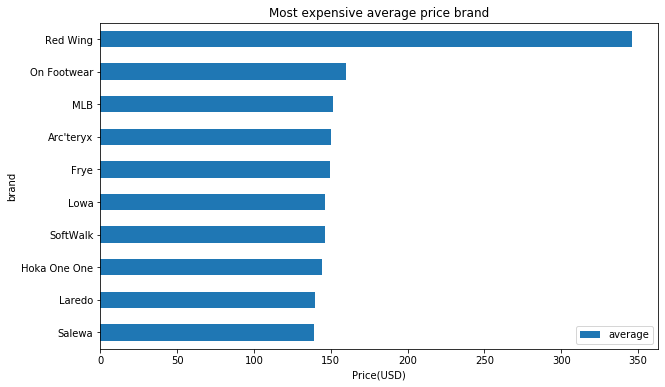

In [24]:
df2 = df1.groupby(['brand'], as_index=False).mean()
df2.sort_values(by='average',ascending=False,inplace=True)
df3=df2.head(10)
df3.drop(['prices.amountMax','prices.amountMin','difference'],axis=1,inplace=True)
df3.set_index('brand', inplace=True)
ax = df3.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Price(USD)')
ax.invert_yaxis()
plt.title('Most expensive average price brand')

# Question
* Is there a typical price distribution (e.g., normal) across brands or within specific brands?

Text(0.5, 1.0, 'Most price difference brand')

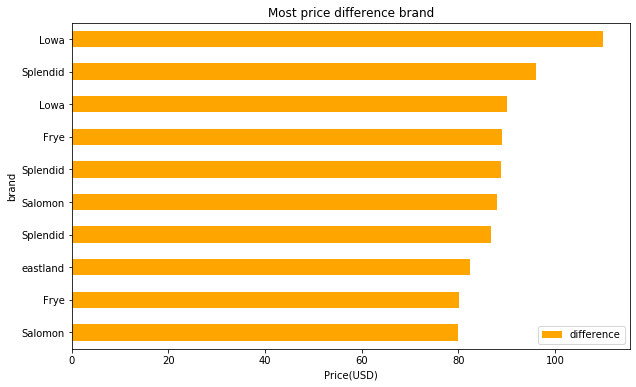

In [25]:
df4 = df1.groupby(['brand','difference'], as_index=False).sum()
df4.sort_values(by='difference',ascending=False,inplace=True)
df5=df4.head(10)
df5.drop(['prices.amountMax','prices.amountMin','average'],axis=1,inplace=True)
df5.set_index('brand', inplace=True)
ax = df5.plot(kind='barh', figsize=(10, 6),color='orange')
plt.xlabel('Price(USD)')
ax.invert_yaxis()
plt.title('Most price difference brand')

In [26]:
df6 = df.groupby(['brand','category'], as_index=False).mean()
df6.round(0)
df6["average"]=df6["average"].astype(int)
df6["difference"]=df6["difference"].astype(int)
df6["prices.amountMax"]=df6["prices.amountMax"].astype(int)
df6["prices.amountMin"]=df6["prices.amountMin"].astype(int)
df6["prices.isSale"]=round(df6["prices.isSale"].astype(float),2)
df6.drop(["size","prices.isSale","prices.amountMax","prices.amountMin","difference"], axis=1, inplace=True)
df6.head()

,brand,category,average
0,2 lips too,Pumps,60
1,Adidas,Athletic,116
2,Adidas Outdoor,Athletic,107
3,Altra,Athletic,120
4,Arc'teryx,Athletic,150


In [27]:
bins = [0, 25, 50, 75, 100, 125, 150,200,250,300,350,400]
labels = ["0-25","25-50","50-75","75-100","100-125","125-150","150-200","200-250","250-300","300-350","350-400"]
df6['averageprice'] = pd.cut(df6['average'], bins=bins, labels=labels)
print (df6)

                              brand      category  average averageprice
0                        2 lips too         Pumps       60        50-75
1                            Adidas      Athletic      116      100-125
2                    Adidas Outdoor      Athletic      107      100-125
3                             Altra      Athletic      120      100-125
4                         Arc'teryx      Athletic      150      125-150
5                             Asics      Athletic      118      100-125
6                            Astral         Boots       89       75-100
7                              Bogs         Boots       64        50-75
8                       Brinley Co.         Boots       33        25-50
9            Brinley Co. Collection         Pumps       63        50-75
10                           Brooks      Athletic      122      100-125
11                          Carrini  Casual Shoes       27        25-50
12                            Chaco         Boots      119      

In [28]:
dfcount = df6.groupby(['averageprice','category'], as_index=False).count()
dfcount.dropna(subset=["brand"],axis=0,inplace=True)
dfcount.drop(['average'],axis=1,inplace=True)
dfcount.rename(columns={'brand':'brand count'},inplace=True)
bins = [0, 1,2, 4, 8, 10,20]
labels = ["1","2","3-4","4-8","8-10",">10"]
dfcount['binnedbrandcount'] = pd.cut(dfcount['brand count'], bins=bins, labels=labels)
dfcount.drop(['brand count'],axis=1,inplace=True)
print (dfcount)

    averageprice      category binnedbrandcount
2           0-25  Casual Shoes              4-8
4           0-25         Flats                1
9           0-25       Sandals                1
10          0-25      Slippers                1
11         25-50      Athletic                2
12         25-50         Boots              4-8
13         25-50  Casual Shoes             8-10
15         25-50         Flats              3-4
17         25-50       Oxfords                1
20         25-50       Sandals              3-4
21         25-50      Slippers                2
22         50-75      Athletic              >10
23         50-75         Boots              >10
25         50-75         Clogs                2
26         50-75         Flats                1
28         50-75       Oxfords              3-4
29         50-75         Pumps              4-8
30         50-75       Rampage                1
31         50-75       Sandals              3-4
33        75-100      Athletic          

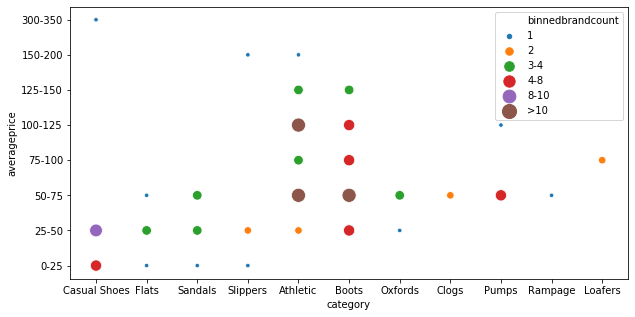

In [29]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="category", y="averageprice",hue="binnedbrandcount", size="binnedbrandcount",sizes=(200, 20),data=dfcount)

In [111]:
dfcolor=df[[ "brand", "prices.amountMax",
       "prices.amountMin","average","difference","color"]]
dfcolor.head()
dfcolorbrand=dfcolor.loc[dfcolor['brand'] =="Nike"]


,brand,prices.amountMax,prices.amountMin,average,difference,color
690,Nike,90.0,84.99,87.50,5.01,Gray
691,Nike,75.0,56.25,65.62,18.75,Gray
692,Nike,75.0,75.00,75.00,0.00,Gray
693,Nike,75.0,56.25,65.62,18.75,White
694,Nike,75.0,56.25,65.62,18.75,Black


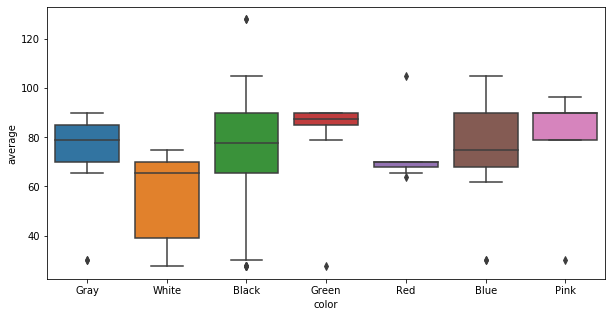

In [112]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="color", y="average", data=dfcolorbrand)
